In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on='city', how='left')

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [12]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

Text(50,25,'Note:Circle size correlates with driver count per city.')

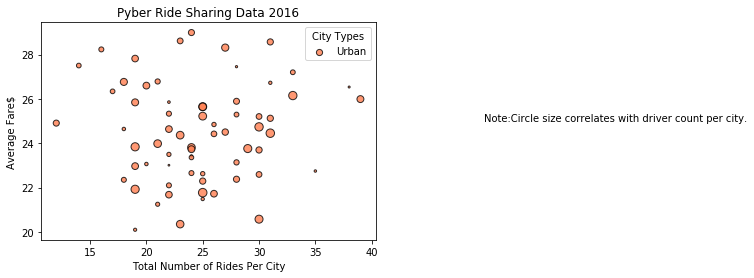

In [14]:
# Obtain the x and y coordinates for each of the three city types
urbn_ride_count = city_ride_data[city_ride_data["type"] == "Urban"].groupby(["city"]).count()["ride_id"]
urbn_avg_fare = city_ride_data[city_ride_data["type"] == "Urban"].groupby(["city"]).mean()["fare"]
urbn_driver_count = city_ride_data[city_ride_data["type"] == "Urban"].groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urbn_ride_count, urbn_avg_fare, s=urbn_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.ylabel("Average Fare$")
plt.xlabel("Total Number of Rides Per City")
# Create a legend
lgnd = plt.legend(title="City Types", loc="best")


# Incorporate a text label regarding circle size
plt.text(50, 25,"Note:Circle size correlates with driver count per city.")



Text(50,25,'Note:Circle size correlates with driver count per city.')

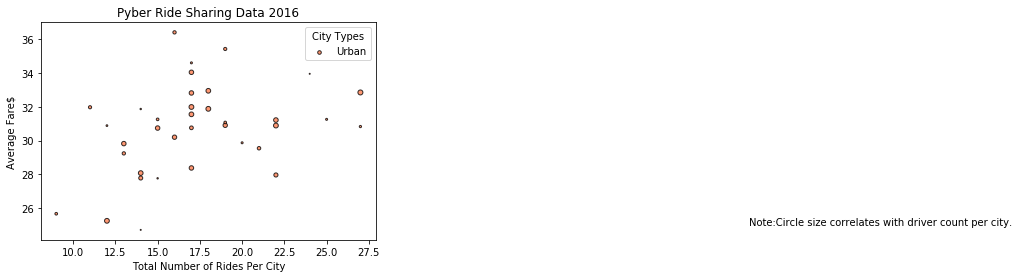

In [15]:
# Obtain the x and y coordinates for each of the three city types
Suburbn_ride_count = city_ride_data[city_ride_data["type"] == "Suburban"].groupby(["city"]).count()["ride_id"]
Suburbn_avg_fare = city_ride_data[city_ride_data["type"] == "Suburban"].groupby(["city"]).mean()["fare"]
Suburbn_driver_count = city_ride_data[city_ride_data["type"] == "Suburban"].groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(Suburbn_ride_count, Suburbn_avg_fare, s=Suburbn_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.ylabel("Average Fare$")
plt.xlabel("Total Number of Rides Per City")
# Create a legend
lgnd = plt.legend(title="City Types", loc="best")


# Incorporate a text label regarding circle size
plt.text(50, 25,"Note:Circle size correlates with driver count per city.")

Text(25,50,'Note:Circle size correlates with driver count per city.')

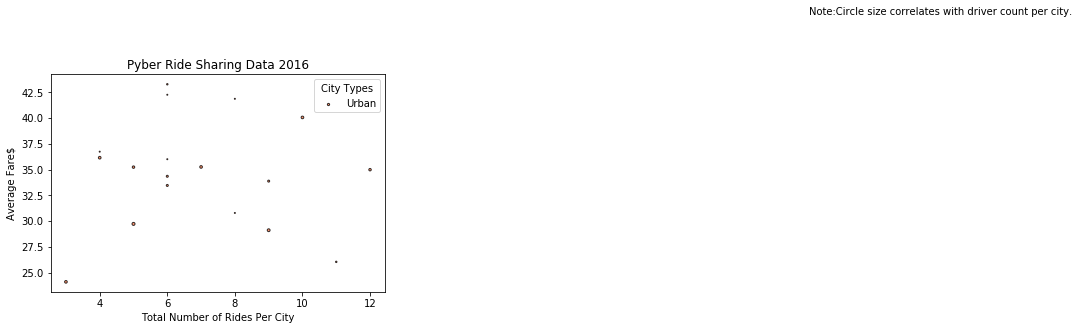

In [16]:
# Obtain the x and y coordinates for each of the three city types
Rural_ride_count = city_ride_data[city_ride_data["type"] == "Rural"].groupby(["city"]).count()["ride_id"]
Rural_avg_fare = city_ride_data[city_ride_data["type"] == "Rural"].groupby(["city"]).mean()["fare"]
Rural_driver_count = city_ride_data[city_ride_data["type"] == "Rural"].groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(Rural_ride_count, Rural_avg_fare, s=Rural_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.ylabel("Average Fare$")
plt.xlabel("Total Number of Rides Per City")
# Create a legend
lgnd = plt.legend(title="City Types", loc="best")


# Incorporate a text label regarding circle size
plt.text(25, 50,"Note:Circle size correlates with driver count per city.")


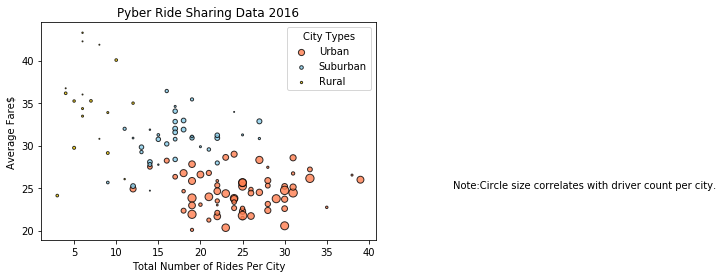

In [17]:
# Build the scatter plots for each city types
plt.scatter(urbn_ride_count, urbn_avg_fare, s=urbn_driver_count, c="coral", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
plt.scatter(Suburbn_ride_count, Suburbn_avg_fare, s=Suburbn_driver_count, c="Skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Suburban")
plt.scatter(Rural_ride_count, Rural_avg_fare, s=Rural_driver_count, c="gold", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.ylabel("Average Fare$")
plt.xlabel("Total Number of Rides Per City")
# Create a legend
lgnd = plt.legend(title="City Types", loc="best")


# Incorporate a text label regarding circle size
plt.text(50, 25,"Note:Circle size correlates with driver count per city.")
plt.savefig("Output/Scatter.png")
plt.show()

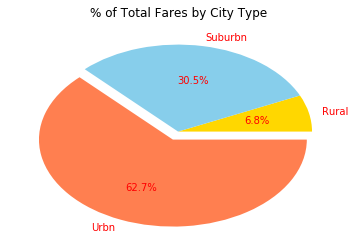

In [18]:
# Calculate Type Percents
type_percents = city_ride_data.groupby(["type"]).sum()["fare"] *100 / city_ride_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents,  colors=["gold", "skyblue", "coral"], labels=["Rural", "Suburbn", "Urbn"], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', textprops={'color':"r"}
       )
plt.title("% of Total Fares by City Type")
plt.savefig("Output/Citytype.png")
# Show Figure
plt.show()

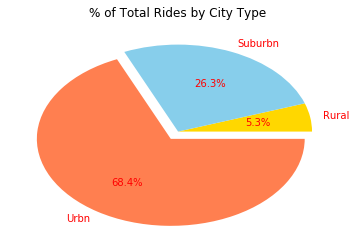

In [19]:
# Calculate Ride  Percents
ride_percents = city_ride_data.groupby(["type"]).count()["ride_id"] *100 / city_ride_data.ride_id.count()

# Build Pie Chart
plt.pie(ride_percents,  colors=["gold", "skyblue", "coral"], labels=["Rural", "Suburbn", "Urbn"], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', textprops={'color':"r"}
       )

plt.title("% of Total Rides by City Type")
plt.savefig("Output/ride_percents.png")
plt.show()

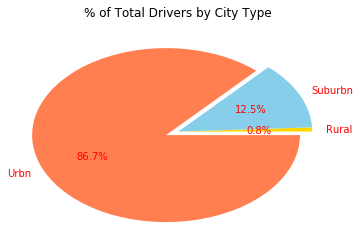

In [20]:
# Calculate Drivers  Percents by city type
driver_percents = city_ride_data.groupby(["type"]).sum()["driver_count"] *100 / city_ride_data.driver_count.sum()

# Build Pie Chart
plt.pie(driver_percents,  colors=["gold", "skyblue", "coral"], labels=["Rural", "Suburbn", "Urbn"], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', textprops={'color':"r"}
       )

plt.title("% of Total Drivers by City Type")
plt.savefig("Output/driver_percents.png")
plt.show()

Observations

If fare is calculated based on distance travelled, then rides in city are more short distance rides.
Urban customers contribute around 60% of total revenue
The number of drivers in Rural is very less compared to the number of rides.